# Encode Multiple Documents API
This API encodes multiple documents at once, returning an embedding for each. Useful for batch processing and subsequent similarity or clustering analysis.

In [4]:
import requests
from dotenv import dotenv_values
import requests

# Load environment variables from .env file
conf = dotenv_values()
API_KEY = conf["API_KEY"]

# Choose model to encode the document: patspecter or paecter
model = "patspecter"

In [5]:
# API Settings
URL = 'https://api.logic-mill.net/api/v1/graphql/'
headers = {
    'content-type': 'application/json',
    'Authorization': 'Bearer ' + API_KEY,
}

# Build GraphQL query
query="""
query encodeDocuments($data: [EncodeObject], $model: String!) {
  encodeDocuments(data: $data, model: $model)
}
"""

# Build variables for the query
variables = {
  "model": "patspecter",
  "data": [
    {
      "id": "trade_resolutions_pat",
      "parts": [
        {
          "key": "title",
          "value": "market driven implied trade resolutions_pat"
        },
        {
          "key": "abstract",
          "value": "An electronic trading system utilizes a Match Engine that receives orders, stores them internally, calculates tradable combinations and advertises the availability of real and implied orders in the form of market data. New tradable items defined as combinations of other tradable items may be included in the calculation of tradable combinations. The disclosed embodiments relate to detection of market conditions where identification of implied opportunities may, for example, subvert real orders resulting in undesirable effects. Under circumstances where such undesirable effects are likely to occur, identification of implied opportunities may be delayed thereby allowing market forces to attempt to resolve the aberrant market conditions and avoid the undesirable effects."
        }
      ]
    },
    {
      "id": "trading_systems_pat",
      "parts": [
        {
          "key": "title",
          "value": "dynamic peg orders in an electronic trading system "
        },
        {
          "key": "abstract",
          "value": "In order to protect a trading party from predatory trading strategies employed by some market participants, especially during certain periods when quotes for a particular security are experiencing rapid changes or transitions, embodiments of the present invention facilitate and support a new type of trading orders whose booking and execution behaviors are dynamically varied in response to environmental market conditions. Pursuant to predefined rules for the new type of trading orders, the orders may be allowed to trade at more aggressive price levels if the market is relatively stable, and the orders can only trade at less aggressive price levels when the market is unstable."
        }
      ]
    }
  ]
}

In [6]:
# Send a POST request to the API
response = requests.post(URL, headers=headers, json={'query': query , 'variables': variables})

In [7]:
# Handle response
if not response.ok:
    raise Exception(f"Error: {response.status_code} - {response.text}")

json_response = response.json()
encoded_documents = json_response['data']['encodeDocuments']
print("Encoded document 1: ", encoded_documents[0])
print("Encoded document 2: ", encoded_documents[1])

Encoded document 1:  [-0.5094876, -0.42910758, -0.60446244, 0.08993333, 0.07467303, -1.3158134, 1.0888672, 0.32978496, -0.1328897, 0.45940572, 0.22710985, -0.19483793, -0.5310378, -0.5598794, -0.19108793, 0.18091515, -0.32183328, 0.8051622, -0.3257313, -0.5954319, 0.45176947, 0.45920807, -0.3988887, 0.36588034, 0.3895847, 1.0595201, -0.687179, 0.7835675, -0.15440154, 0.6325534, -0.07596238, -1.130564, 0.92189246, -0.0053143157, -0.14579551, 0.089132085, 0.322743, -1.0702231, -0.6496761, 0.042815957, -0.6911558, 0.39844596, 0.5646807, -1.519328, -0.5809928, 0.96163785, -0.30681768, 0.9669546, -0.23047183, -0.3112278, 0.83491683, -1.6832802, 0.75912595, 0.7178667, 0.33589488, 0.25779188, -1.0830967, -0.8940718, 0.8459311, 0.053522922, -1.3081673, 0.19630818, 1.0427357, -0.92023265, 1.5911087, 0.3184592, -0.02456668, -0.43697524, 0.054902494, 0.529553, 0.92171264, -0.23722008, 0.33234715, 0.11387506, 0.97097033, 0.07819168, -0.06347807, 0.8892983, -1.262248, -0.4431137, -0.2121023, -0.023

## Multiple Document Encoding
Logic Mill also allows us to embedd more than two documents. The following example encodes five documents

In [8]:
# Define documents to embedd
documents = [
    {"id": "10.1007/s41060-024-00546-5", "title": "Neural lasso", "abstract": "In recent years, there has been a growing interest in establishing bridges between statistics and neural networks. This article focuses on the adaptation of the widely used lasso algorithm within the context of neural networks. To accomplish this, the network configuration is first designed. After that, in order to estimate the network weights, three optimization algorithms are considered. The first one, called standard neural lasso, employs the conventional procedure for training neural networks. The second optimization algorithm, termed restricted neural lasso, mimics traditional lasso to establish a connection between statistics and machine learning. Finally, a third optimization algorithm, called voting neural lasso was developed. Voting neural lasso offers a novel way of estimating weights by considers the significance of variables across the cross-validation scenarios. Results showed that the conventional approach of training neural networks resulted in a lower performance when the validation set is not sufficiently representative. It was also observed that restricted neural lasso and the traditional lasso obtained equivalent results, which shows the convergence of the neural technique with the statistical one. Finally, the developed voting neural lasso algorithm outperformed the traditional lasso. These results were obtained across diverse training sets, encompassing observations ranging from as few as 47 to as many as 4000, with the number of predictors varying from 9 to 200."},
    {"id": "10.1007/s00521-025-11180-y", "title": "Virtual neural networks", "abstract": "A new concept, termed virtual neural networks, is introduced, where the count of trainable parameters is kept constant, and scalability is attained purely through computational resources. This concept is an abstract framework that can be realized using any standard convolutional neural network. It merges siamese neural networks with a deep ensemble technique by generating numerous virtual models that share weights derived from a small set of physical models. The ensemble comprises up to hundreds of trained models simultaneously. All virtual networks take the same input, and their interconnected structure induces an internal distortion that boosts the entire ensemble robustness. The accuracy of the ensemble improves as the number of virtual networks increases, without changing the capacity. Virtual neural networks outperform larger capacity models, typical deep ensembles, and contemporary approaches like SWA and Masksembles. Additionally, the highest performing individual model from the ensemble surpasses other models trained individually, even those with a greater number of parameters."},
    {"id": "10.1007/s44258-024-00042-2", "title": "Towards NeuroAI", "abstract": "Throughout history, the development of artificial intelligence, especially artificial neural networks, has been continuously influenced by a deeper understanding of the brain. This influence includes the development of the neocognitron, considered a precursor to convolutional neural networks. The emerging field of NeuroAI posits that leveraging neuroscience knowledge could significantly advance AI by imbuing networks with enhanced capabilities. Unlike the human brain, which features a variety of morphologically and functionally distinct neurons, artificial neural networks typically rely on a homogeneous neuron model. In the human brain, the diversity of neurons facilitates a wide range of intelligent behaviors. Given that artificial networks aim to mimic the human brain, incorporating a diversity of neuron models could address key challenges in artificial intelligence, such as efficiency, interpretability, and memory capacity. This perspective begins by examining the basics of biological neuronal diversity and how biological neurons transmit and process information. We then explore research efforts to design novel neuron models for artificial networks and discuss the potential benefits of neuronal diversity, including applications in several critical areas. Finally, we address the challenges and future directions for integrating neuronal diversity into artificial networks, highlighting its potential to enrich NeuroAI."},
    {"id": "10.1007/s10851-024-01171-4", "title": "Riesz Networks", "abstract": "Scale invariance of an algorithm refers to its ability to treat objects equally independently of their size. For neural networks, scale invariance is typically achieved by data augmentation. However, when presented with a scale far outside the range covered by the training set, neural networks may fail to generalize. Here, we introduce the Riesz network, a novel scale- invariant neural network. Instead of standard 2d or 3d convolutions for combining spatial information, the Riesz network is based on the Riesz transform which is a scale-equivariant operation. As a consequence, this network naturally generalizes to unseen or even arbitrary scales in a single forward pass. As an application example, we consider detecting and segmenting cracks in tomographic images of concrete. In this context, ‘scale’ refers to the crack thickness which may vary strongly even within the same sample. To prove its scale invariance, the Riesz network is trained on one fixed crack width. We then validate its performance in segmenting simulated and real tomographic images featuring a wide range of crack widths. An additional experiment is carried out on the MNIST Large Scale data set."},
    {"id": "10.1038/s41377-024-01590-3", "title": "Optical neural networks", "abstract": "Artificial intelligence has prevailed in all trades and professions due to the assistance of big data resources, advanced algorithms, and high-performance electronic hardware. However, conventional computing hardware is inefficient at implementing complex tasks, in large part because the memory and processor in its computing architecture are separated, performing insufficiently in computing speed and energy consumption. In recent years, optical neural networks (ONNs) have made a range of research progress in optical computing due to advantages such as sub-nanosecond latency, low heat dissipation, and high parallelism. ONNs are in prospect to provide support regarding computing speed and energy consumption for the further development of artificial intelligence with a novel computing paradigm. Herein, we first introduce the design method and principle of ONNs based on various optical elements. Then, we successively review the non-integrated ONNs consisting of volume optical components and the integrated ONNs composed of on-chip components. Finally, we summarize and discuss the computational density, nonlinearity, scalability, and practical applications of ONNs, and comment on the challenges and perspectives of the ONNs in the future development trends."}
]

# Build variables for the query
variables = {
    "model": model,
    "data": [
        {
            "id": doc["id"],
            "parts": [
                {"key": "title", "value": doc["title"]},
                {"key": "abstract", "value": doc["abstract"]}
            ]
        }
        for doc in documents
    ]
}

In [9]:
# Send a POST request to the API
response = requests.post(URL, headers=headers, json={'query': query , 'variables': variables})

In [10]:
# Handle response
if not response.ok:
    raise Exception(f"Error: {response.status_code} - {response.text}")

json_response = response.json()
encoded_documents = json_response['data']['encodeDocuments']

## Similarity Computation

We can use the embeddings to compute a similarity metric between the documents. The following code computes the cosine similarity.

In [11]:
import numpy as np

# Convert to numpy array
X = np.array(encoded_documents)

# Normalize each vector
X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)

# Compute cosine similarity matrix
sim_matrix = np.dot(X_norm, X_norm.T)

# Print the similarity matrix
print("Cosine Similarity Matrix:")
print(sim_matrix)

Cosine Similarity Matrix:
[[1.         0.96577103 0.94743144 0.93088197 0.93705011]
 [0.96577103 1.         0.95446522 0.93607351 0.95298013]
 [0.94743144 0.95446522 1.         0.91132637 0.94463317]
 [0.93088197 0.93607351 0.91132637 1.         0.92193021]
 [0.93705011 0.95298013 0.94463317 0.92193021 1.        ]]


To visualize the similarity between the document embeddings, we can plot the cosine similarity matrix as a heatmap. This provides an intuitive overview of how closely related the documents are to each other based on their embeddings.To 

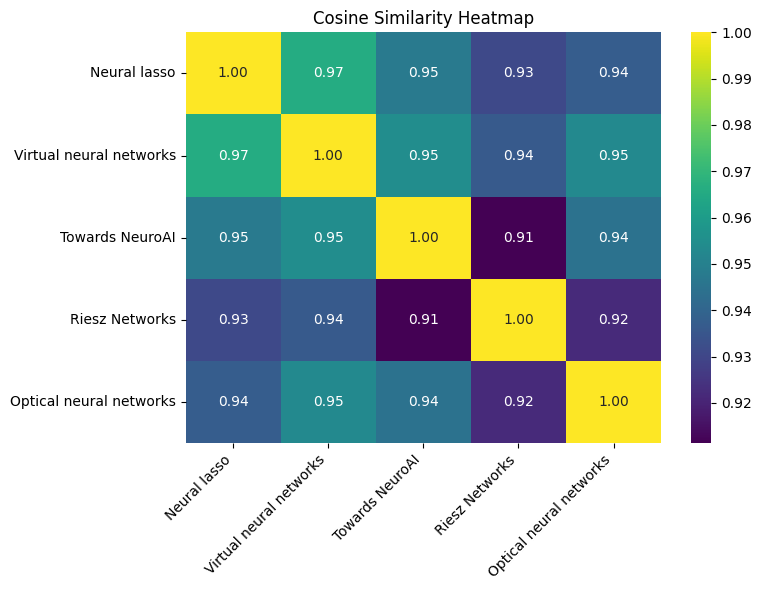

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optionally, use document titles as labels
labels = [doc["title"] for doc in documents]

plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=labels, yticklabels=labels)
plt.title("Cosine Similarity Heatmap")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()